In [35]:
import synapseclient as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
sns.set_style("dark")

In [60]:
syn = sc.login()
entity = syn.get("syn20817213")
data = pd.read_csv(entity["path"], index_col = 0)

Welcome, aryton tediarjo!



In [68]:
data["min_sfm"] = data[[feat for feat in data.columns if "sfm" in feat]].min(axis = 1)

In [69]:
data.groupby(["healthCode"])

,recordId,createdOn,healthCode,sfm_auc_x,sfm_auc_y,sfm_auc_z,sfm_auc_AA,age,gender,PD,education,Enter_State,UTC_offset,min_sfm
0,674ab7db-c410-466b-9799-a1b9068224c8,2015-03-09 19:50:29,1e0888df-7059-4fab-9dd7-b0b6616442e6,4.432750554903193,4.503116528411789,4.482760579090213,4.405712059374057,51,Male,True,8,DISTRICT OF COLUMBIA,-5.0,4.405712059374057
1,7b556fcc-ebb8-46c3-b06a-0723243fc601,2015-03-09 19:52:14,1e0888df-7059-4fab-9dd7-b0b6616442e6,4.497290444564484,4.363482904622456,4.337255111147323,4.593371147695133,51,Male,True,8,DISTRICT OF COLUMBIA,-5.0,4.337255111147323
2,c32e3c41-1f5e-4b4f-9a5f-5f053ddd60ac,2015-03-09 19:54:01,1e0888df-7059-4fab-9dd7-b0b6616442e6,4.593507284471409,4.213632826899648,4.368680277384027,4.352726432903591,51,Male,True,8,DISTRICT OF COLUMBIA,-5.0,4.213632826899648
3,ab490d44-c849-45d9-a841-8440a0d941a7,2015-03-09 20:29:13,882b9ac4-ac7a-4108-9644-83d3544f28b4,4.282621810686278,4.341551339584094,4.249400807383465,4.350117772560125,63,Male,False,6,ARIZONA,-7.0,4.249400807383465
4,eb66b1f1-8f7a-4b51-8a0f-fbff899d5ca4,2015-03-09 20:30:33,882b9ac4-ac7a-4108-9644-83d3544f28b4,4.361620196207758,4.288341277279119,4.266321333623955,4.340762344318171,63,Male,False,6,ARIZONA,-7.0,4.266321333623955
5,cd78e98c-a9fa-4ff6-963f-74e2d6af8a17,2015-03-09 20:48:07,416a984c-4a94-452b-93be-499c1ac374d6,4.217938647544375,4.261195412883449,4.418536542924985,4.292819419267094,52,Male,True,2,OKLAHOMA,-6.0,4.217938647544375
6,a699e019-6772-401f-a837-1acb9bdb634e,2015-03-09 21:03:41,05c7ec40-2ea0-4714-910a-d818bd47e503,4.334632282570784,4.398287324274957,4.4364057863853175,4.469459789062127,67,Male,False,8,CALIFORNIA,-8.0,4.334632282570784
7,423b867c-dfaa-4e62-b7d5-40f474181fc4,2015-03-09 21:04:20,3599ec25-58c9-4215-aac3-a1287f7a7601,4.382098744539113,4.317231823447,4.336326739581094,4.439188663866636,70,Male,True,7,CALIFORNIA,-8.0,4.317231823447
8,1fe05bab-0c8f-48b5-8d20-412ecaccadcf,2015-03-09 21:05:24,05c7ec40-2ea0-4714-910a-d818bd47e503,4.542624059905333,4.63984786549545,4.250713146044582,4.073403090831148,67,Male,False,8,CALIFORNIA,-8.0,4.073403090831148
9,41095bb0-3cd8-439a-a3d2-d17a29865a84,2015-03-09 21:06:50,05c7ec40-2ea0-4714-910a-d818bd47e503,4.208416238190278,4.416905231218722,4.095960932944273,4.11293047370264,67,Male,False,8,CALIFORNIA,-8.0,4.095960932944273


In [31]:
def fill(params):
    if params == "EMPTY FILEPATHS" or params == "NO ACCELEROMETER DATA":
        return np.NaN
    else:
        return float(params)
    
def plot_distribution(data):
    for i in [i for i in data.columns if "sfm" in i]:
        PD = data[data["PD"] == True][i].dropna()
        NONPD = data[data["PD"] == False][i].dropna()
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        sns.distplot(PD, label = "PD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.distplot(NONPD, label = "NONPD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.boxplot(x = "PD", y = i, data = data, ax = axes[1], orient = "v", order = [True, False])
        axes[0].set_title("p-values: {}".format(ttest_ind(PD, NONPD)[1]))
        axes[0].grid()
        axes[1].grid()
        plt.show()
        
def aggregate_func(data, gender):
    data = data[data["gender"] == gender]
    median_data = data.groupby("healthCode").median()
    mean_data = data.groupby("healthCode").mean()
    max_data = data.groupby("healthCode").max()
    min_data = data.groupby("healthCode").min()
    return median_data, mean_data, max_data, min_data
        

for feat in [feat for feat in data.columns if "sfm" in feat]:
    data[feat] = data[feat].apply(fill)

# 1. Male Balance Data

In [49]:
male_balance_median_data, male_balance_mean_data, male_balance_max_data, male_balance_min_data = aggregate_func(data, "Male")

#### a. Median

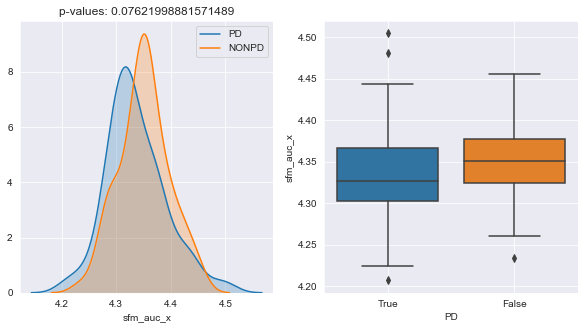

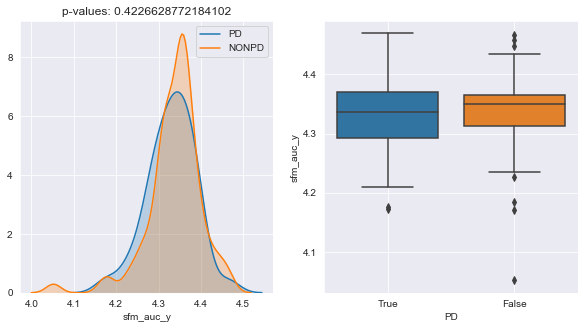

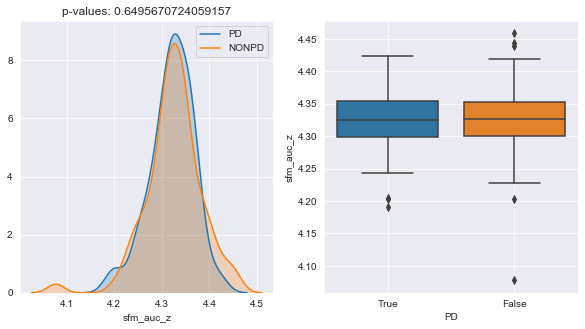

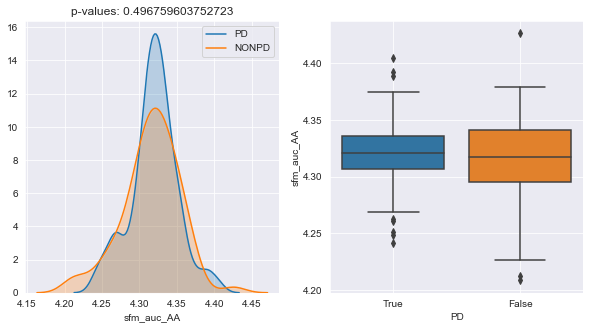

In [50]:
plot_distribution(male_walking_median_data)

#### b. Mean

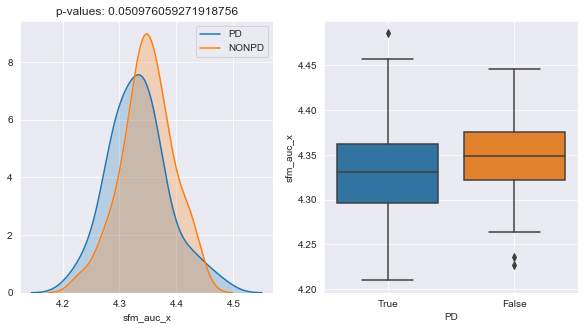

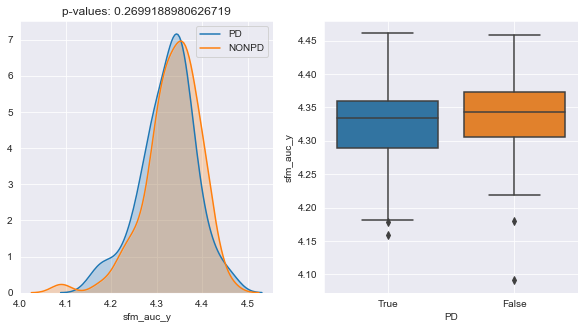

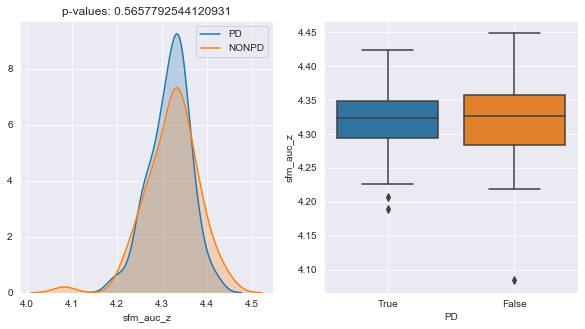

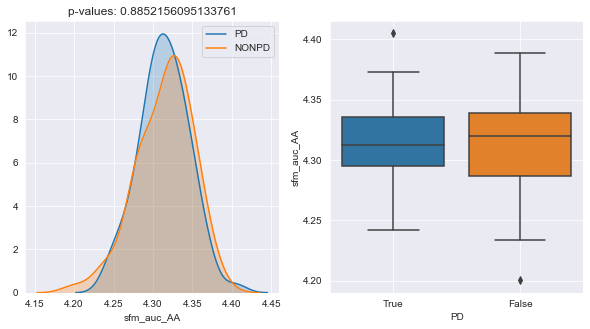

In [45]:
plot_distribution(male_walking_mean_data)

### c. Minimum

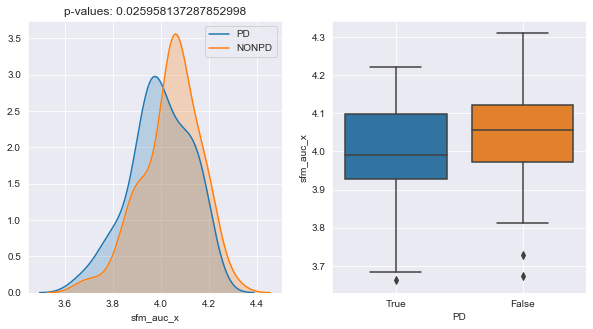

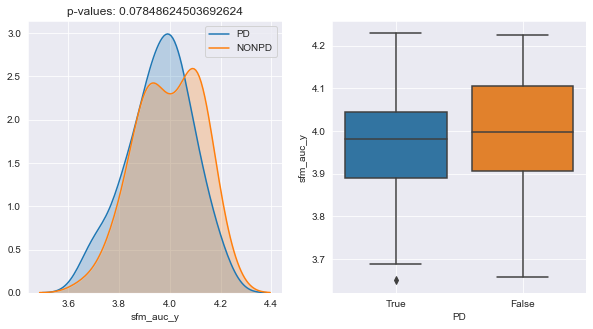

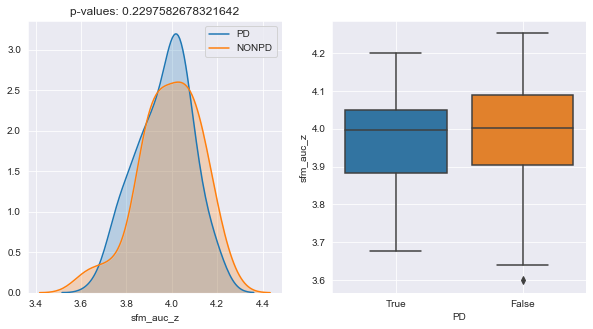

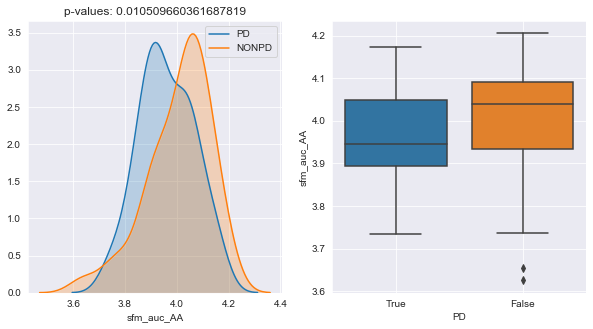

In [47]:
plot_distribution(male_walking_min_data)

# 2. Female Balance Data

In [51]:
female_balance_median_data, female_balance_mean_data, female_balance_max_data, female_balance_min_data = aggregate_func(data, "Female")

#### a. Median

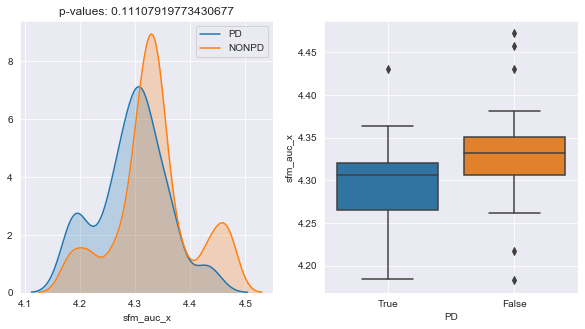

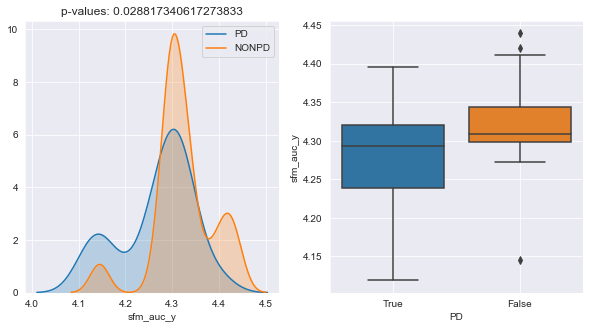

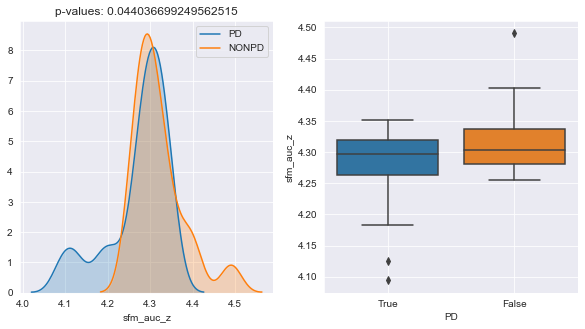

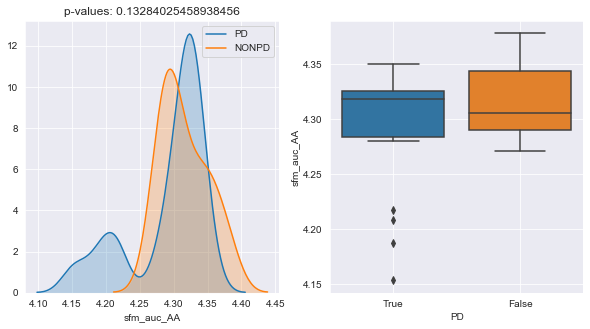

In [53]:
plot_distribution(female_balance_median_data)

#### b. Mean

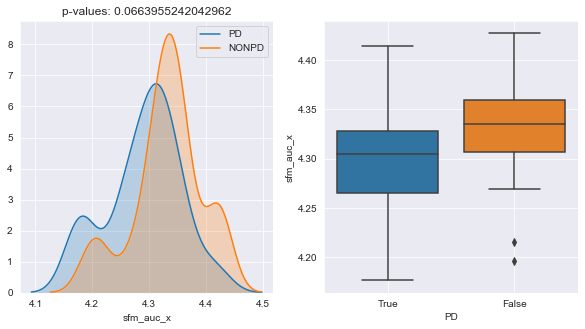

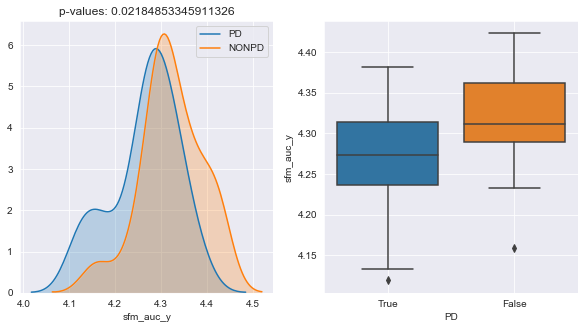

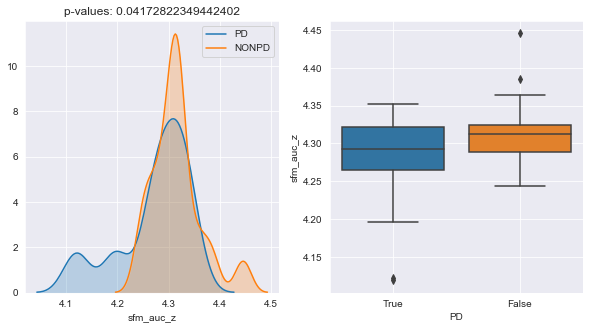

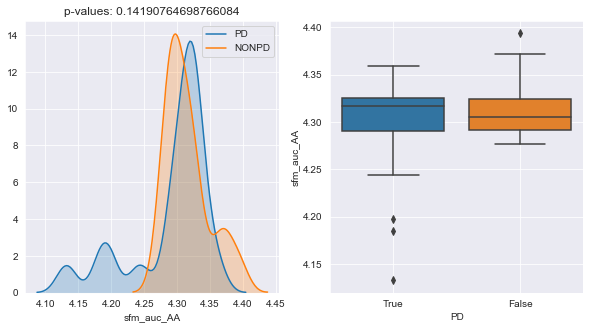

In [54]:
plot_distribution(female_balance_mean_data)

#### c. Minimum

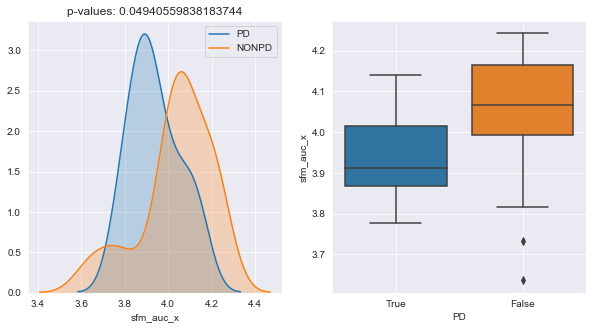

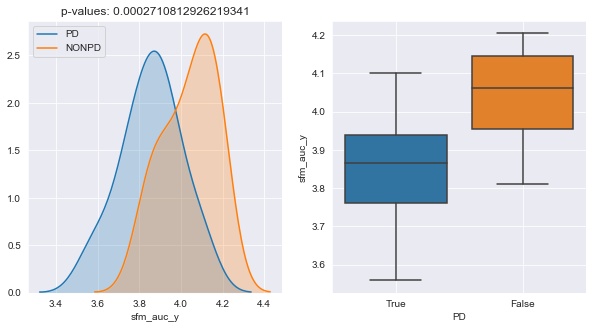

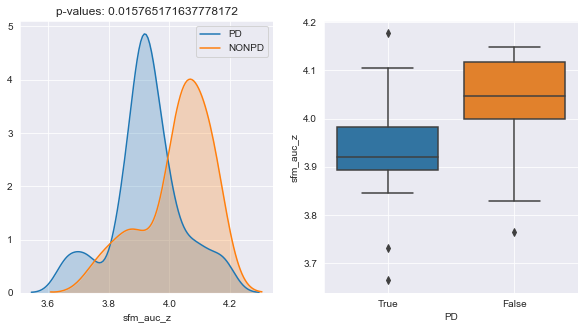

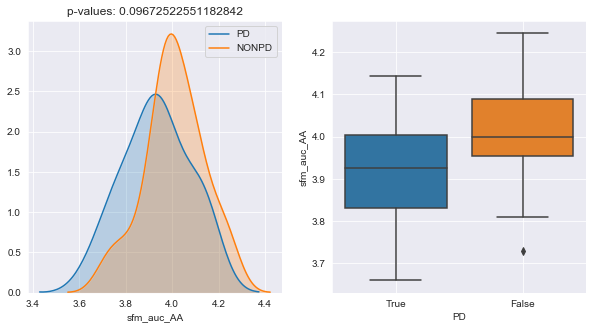

In [55]:
plot_distribution(female_balance_min_data)

# 3. Without Gender Case

#### a. Median

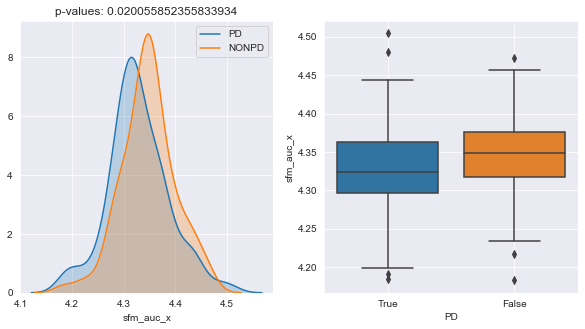

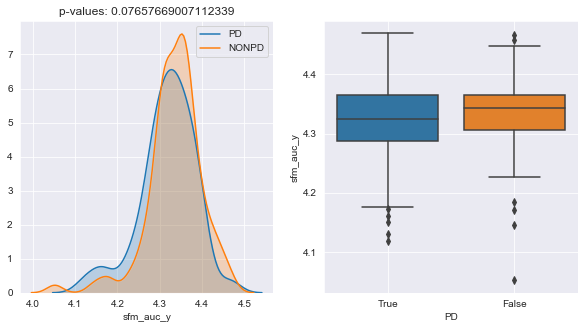

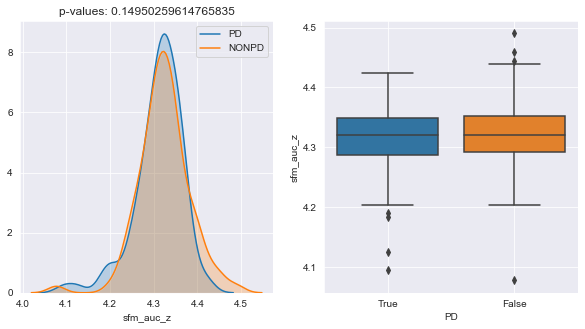

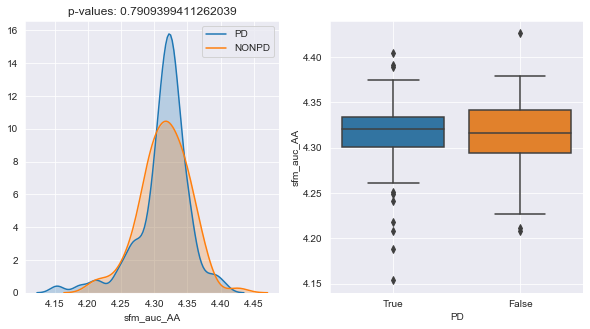

In [57]:
plot_distribution(data.groupby("healthCode").median())

#### b. Mean

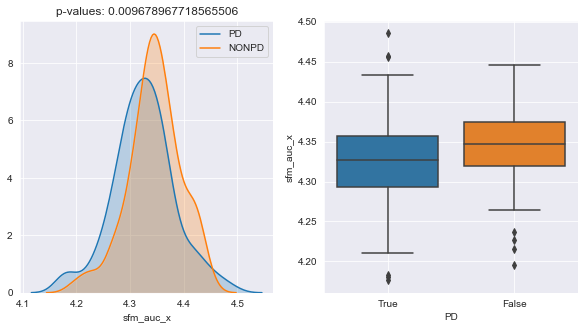

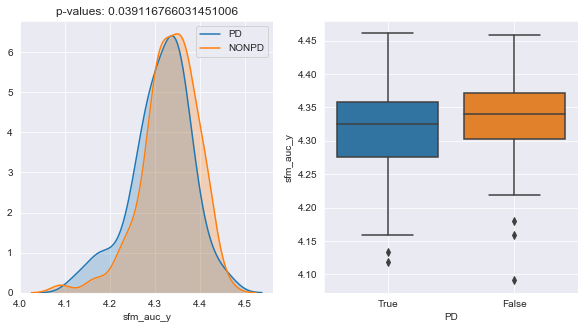

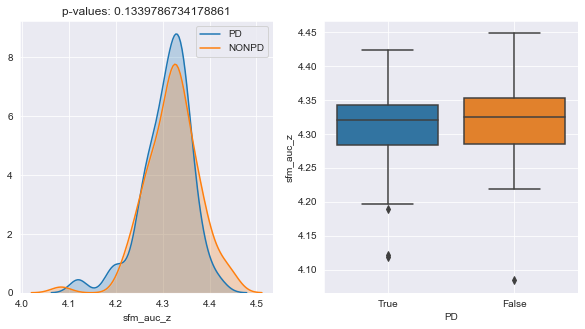

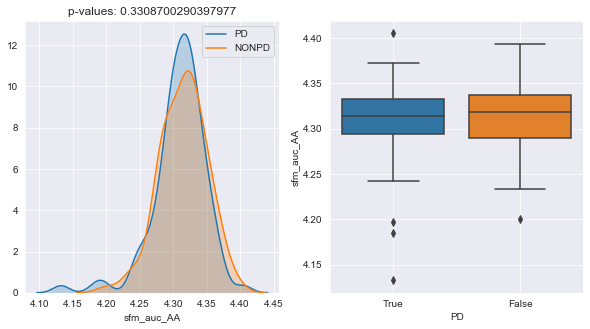

In [58]:
plot_distribution(data.groupby("healthCode").mean())

#### c. Minimum

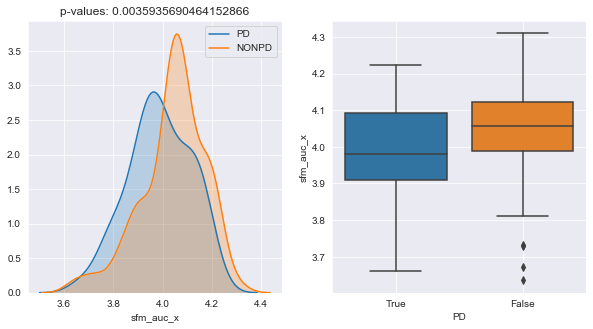

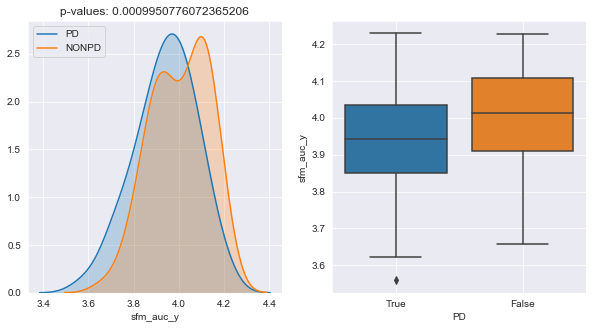

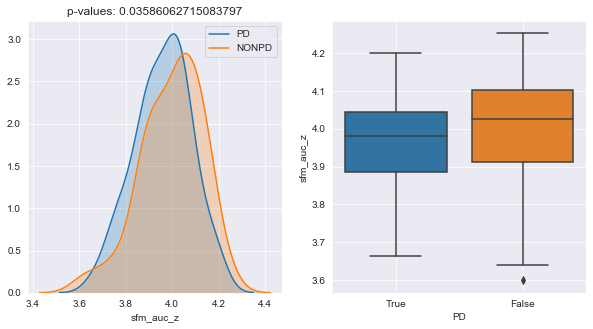

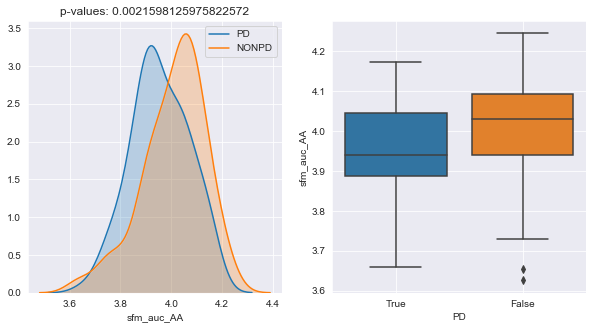

In [59]:
plot_distribution(data.groupby("healthCode").min())